# CA2 Group 9

Members: Jovan (2401418), Joen (2415828), Ryan (2401450)

Class: DAAA/FT/1B/03

Datasets can be found in the readme

# Contributions
Jovan:

Data Cleaning:
- kaggle corporate
- review data
- MOM I3

Plotting:
- Kaggle corporate
- review data
- MOM I4

Joen:

Data Cleaning: 
- MOM I3
- MOM I4
- MOM C8
- Graduation Employment Survey

Plotting:
- Graduation Employment Survey
- MOM C8

Ryan:

Data Cleaning:
- Kaggle Corporate

Plotting:
- Review Data
- Kaggle Corporate


In [33]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.gofplots import qqplot
import statsmodels.api as sm
import statsmodels.formula.api as smf

import warnings

# Suppress specific warnings
warnings.simplefilter(action="ignore", category=UserWarning)
warnings.simplefilter(action="ignore", category=RuntimeWarning)




# NOTE

Due to the nature of the code, we cannot suppress fully all of the outputs

Upon completed running of the below cell, you can clear out the cell outputs from the small ... btn

Sorry for any inconveneince caused

In [ ]:
# Running all the files
%matplotlib agg
%run kaggle_corporate.ipynb
%run MOMC8.ipynb
%run MOMI3.ipynb
%run MOMI4.ipynb
%run review-sgp-redo.ipynb
%run graduation_employment_survey.ipynb


### Problem Statement
Which industry allows themselve to develop the best while maintaining a health lifestyle

### Employment

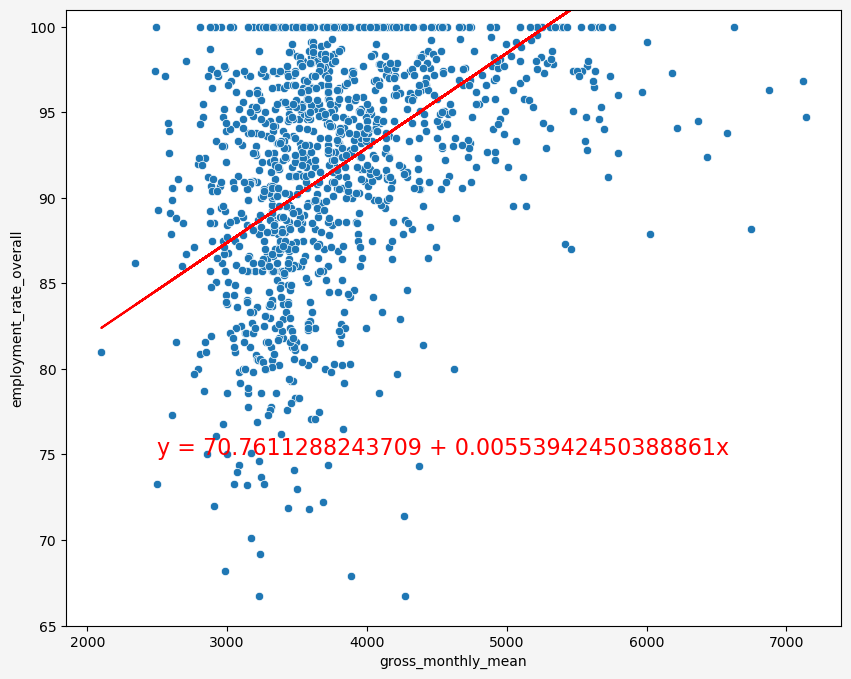

In [58]:
plot_ols('gross_monthly_mean', 'employment_rate_overall', survey_df)

These suggest that companies paying higher salaries are more likely to employ people

This can be for a number of reasons:
1. Companies are less likely to retrench you
2. Salary compensation is good
3. Benefits from the company is good

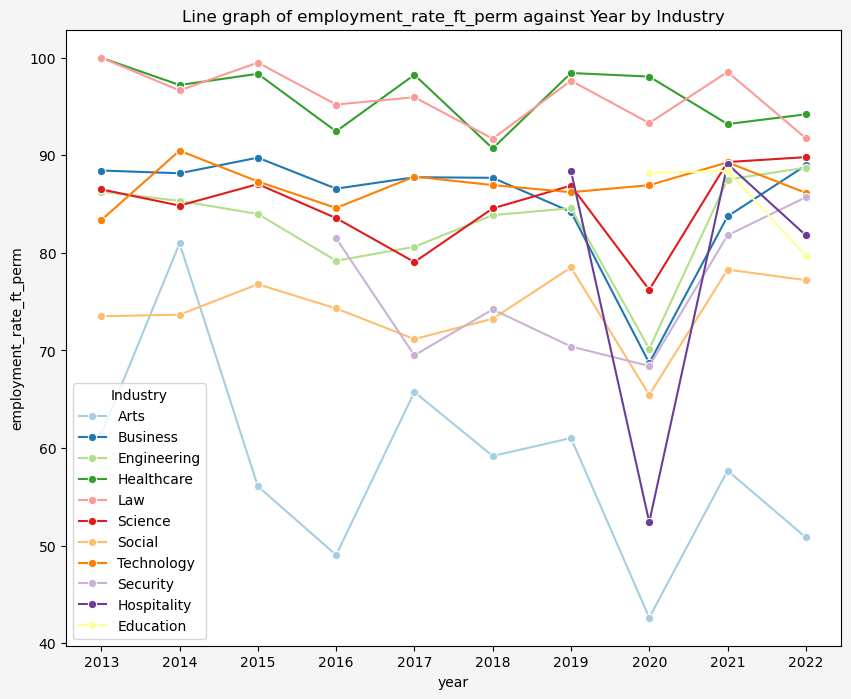

In [50]:
plt.figure(figsize=(10,8), facecolor='whitesmoke')
sns.lineplot(data=ftEmployRate_by_yearIndustry, x="year", y="employment_rate_ft_perm", hue="Industry", marker="o", palette='Paired')
plt.title('Line graph of employment_rate_ft_perm against Year by Industry')
plt.show()

Observations
<ul>
    <li>Law and Healthcare have signifacntly higher full time employment accross all years</li>
    <li>And while most industries are affected by 2020 (covid-19 pandemic first hits), Law, Healthcare and Technology seem to remain unaffected</li>
    <li>This Suggests that they have the most Job Stability, unlikely to lose their jobs event during pandemics</li>
</ul>

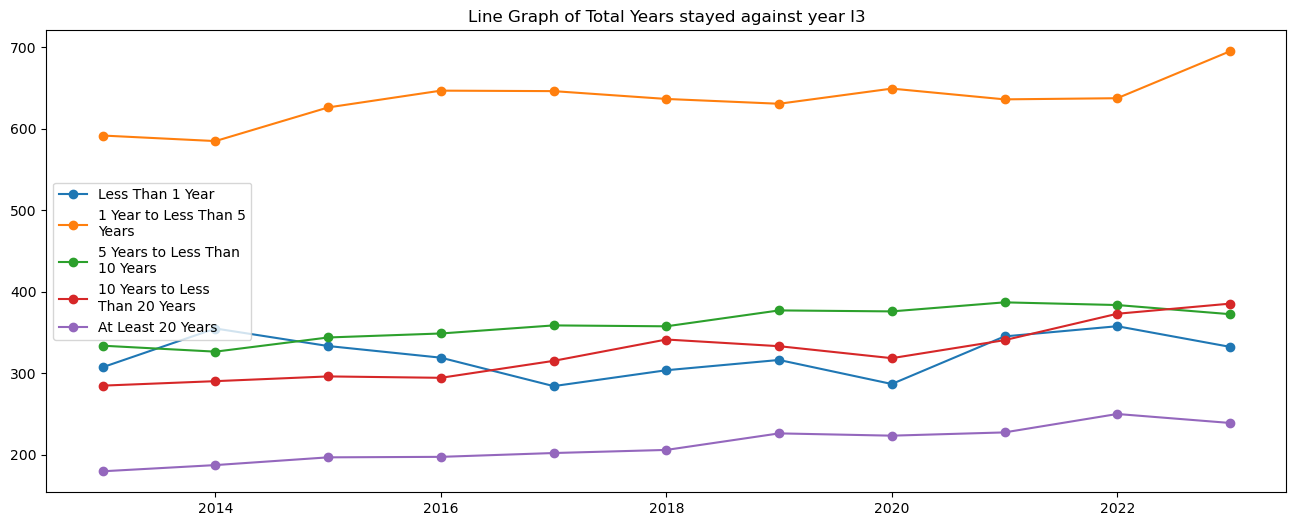

In [36]:
plot_i3_line(total_data , 'Total')

Observation

- '1-5 Years' has the highest amount of employees across all years and has been steadily increasing
- '5-10 Years', '10-20 Years' and '>20 Years' has been increasing slightly
- While '< 1 Year' increased in 2014, decreased from then to 2020, and seems to increase slightly to 2023

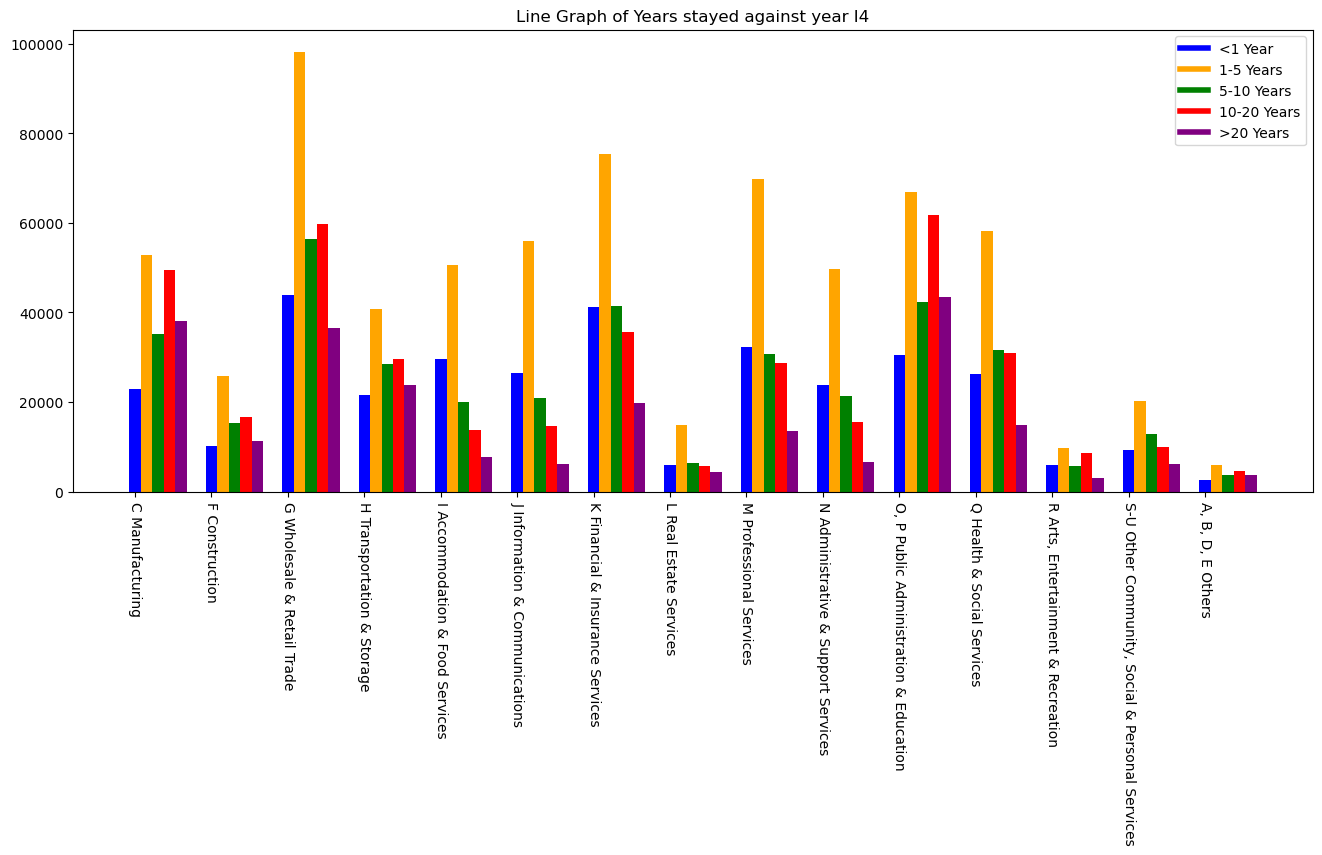

In [37]:
indexes = momi4_no_total.index
colors = [
  'blue',
  'orange',
  'green',  
  'red',
  'purple',
]

plt.figure(figsize=(16 , 6))

for i , industry in enumerate(indexes):
  data = momi4_no_total.loc[[industry] , :]
  cols = data.columns
  
  for x , col in enumerate(cols):
    if col == 'Total':
      continue
    plt.bar(i + 0.15 * x , data[col] , width=0.15 , color=colors[x -1]) 

    
handles = [
    plt.Line2D([0], [0], color='blue', lw=4),  
    plt.Line2D([0], [0], color='orange', lw=4),  
    plt.Line2D([0], [0], color='green', lw=4),  
    plt.Line2D([0], [0], color='red', lw=4),  
    plt.Line2D([0], [0], color='purple', lw=4),  
]

plt.title(f'Line Graph of Years stayed against year I4')
plt.xticks(np.arange(len(indexes)) + 0.15 , indexes , rotation=270)
plt.legend(handles=handles , labels=list(momi4_no_total.columns[1:]))
plt.show()

Observation

- 'Wholesale & Retail Trade', 'Financial & Insurance Services' and 'Professional Services' have the highest proportion of employees leaving in 1-5 Years
- 'Manufacturing', 'Wholesale & Retail Trade' and 'Public Administration and Education' have higher proportions of employees staying longer periods 5-20+ years
- This can suggest that Financial and Professional Services Treat you as disposable and easily replaceable
- While Industries such as Education, Manufactoring have better job securities

Retail has both higher proportions of employees leaving and staying.

This may suggest that employees see better job opportunities outside of retail, despite it having a good job security

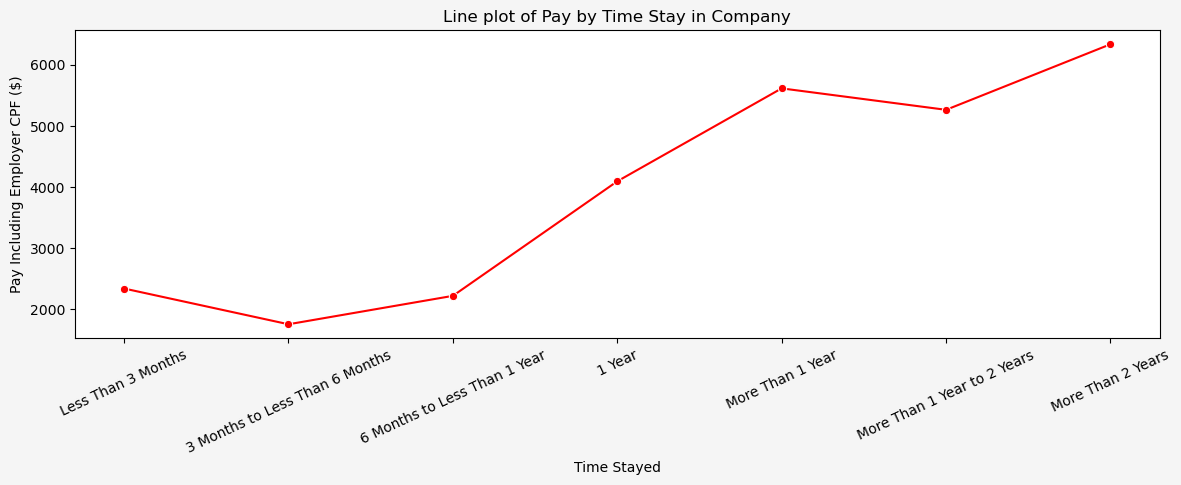

In [51]:
plt.figure(figsize=(14,4), facecolor='whitesmoke')
sns.lineplot(data=momc8, x='Time Stayed', y='Including Employer CPF', marker='o', c='r')
plt.title('Line plot of Pay by Time Stay in Company')
plt.xticks(rotation=25)
plt.ylabel('Pay Including Employer CPF ($)')
plt.show()

This shows that overall an increase in the time spent in a company, the higher you pay will be

As such, Earlier mentioned jobs with high job security may also yield a higher may as time goes on.

You can see such results even with just 2 years within the company

## Salary

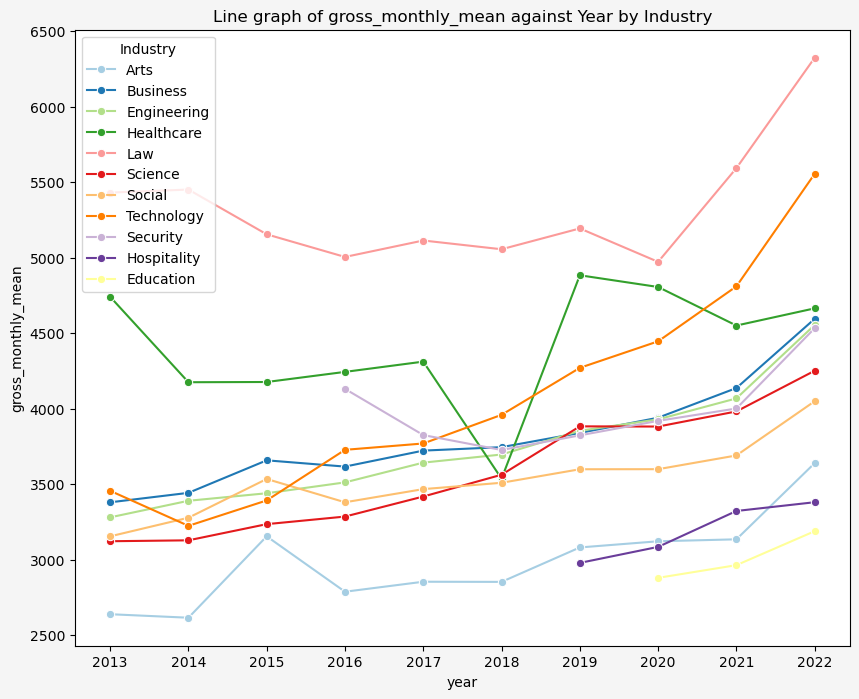

In [38]:
plt.figure(figsize=(10,8), facecolor='whitesmoke')
sns.lineplot(data=gmmean_by_yearIndustry, x="year", y="gross_monthly_mean", hue="Industry", marker="o", palette='Paired')
plt.title('Line graph of gross_monthly_mean against Year by Industry')
plt.show()

Observations
<ul>
    <li>The general trend of mean income across all industries is positive in recent years</li>
    <li>Industries like Healthcare can be very susceptible to fluctuations in pay across years</li>
    <li>While industries like Social or Buisness remain rather unaffected across time</li>
    <li>Law and Technology Industries seen to have steeper increase in recent years so these may be the industries that will continue to grow the fastest and greatest</li>
    <li>Busniess, Security, Science, Engineering and Social also seem to have a steady growth in gross monthly mean salary. They may still be relatively competetive fields to work in.</li>
</ul>



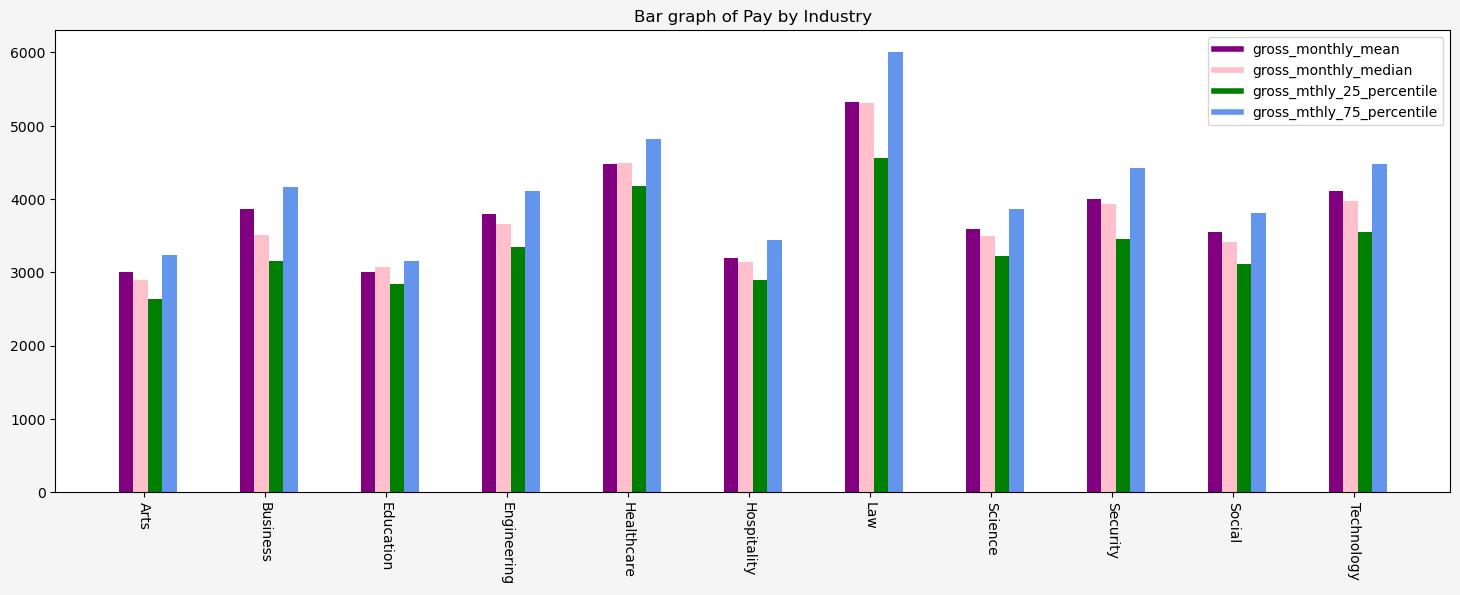

In [39]:
indexes = grosspay_by_industry.index
colors = [
  'purple',
  'pink',
  'green',
  'cornflowerblue',
]

plt.figure(figsize=(18, 6), facecolor='whitesmoke')

for i , industry in enumerate(indexes):
  data = grosspay_by_industry.loc[[industry] , :]
  cols = data.columns
  
  for x , col in enumerate(cols):
    plt.bar(i + 0.12 * x , data[col] , width=0.12 , color=colors[x]) 


handles = [
    plt.Line2D([0], [0], color='purple', lw=4),  
    plt.Line2D([0], [0], color='pink', lw=4),  
    plt.Line2D([0], [0], color='green', lw=4),  
    plt.Line2D([0], [0], color='cornflowerblue', lw=4),  
]

plt.title('Bar graph of Pay by Industry')
plt.xticks(np.arange(len(indexes)) + 0.15 , indexes , rotation=270)
plt.legend(handles=handles , labels=list(grosspay_by_industry.columns[0:]))
plt.show()

Observations
<ul>
    <li>The genaral trend of pay from industry to industry can be seen - Law has highest pay across most graduates, hospitality has lowest pay across most graduates</li>
    <li>We can also observe the nature of each industries' distribution of pay:</li>
    <li>For example, Arts and Buisness have mean monthly pays that are higher than their median, and median closer to 25th percentile,<br/>hence we can infer that the distribution of payment is positively skewed, meaning most graduates are given the lower end of the pay range</li>
    <li>Education has mean monthly pays that are lower than their median, and median closer to 75th percentile<br/>hence the distribution of payment is negatively skewed, and it is more common for graduates to recieve the higher end of the pay range</li>
    <li>Industries like Healthcare and Law are nearly normal in their distribution and pay amount is distributed evenly</li>
</ul>

## Work Stress and Balance

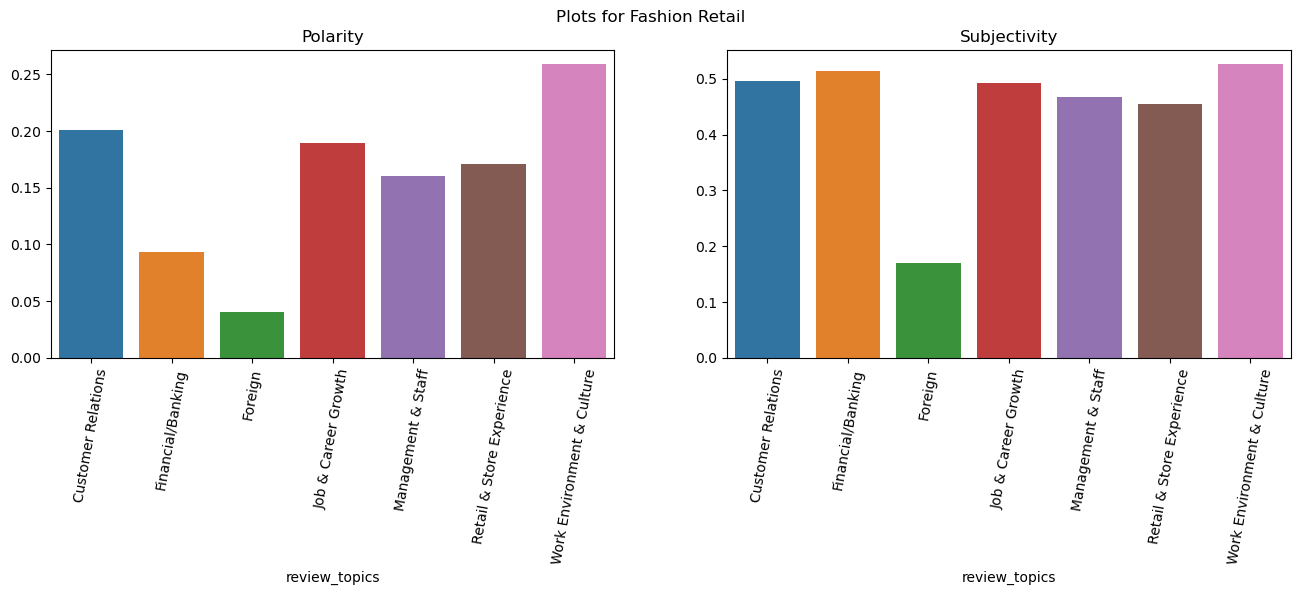

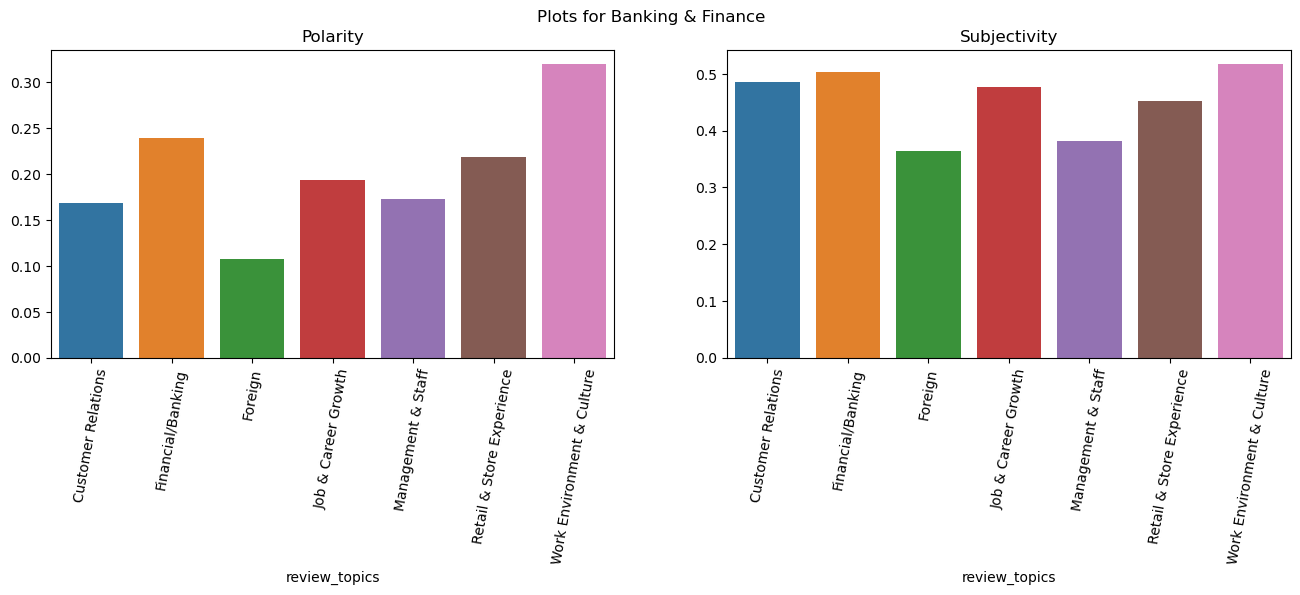

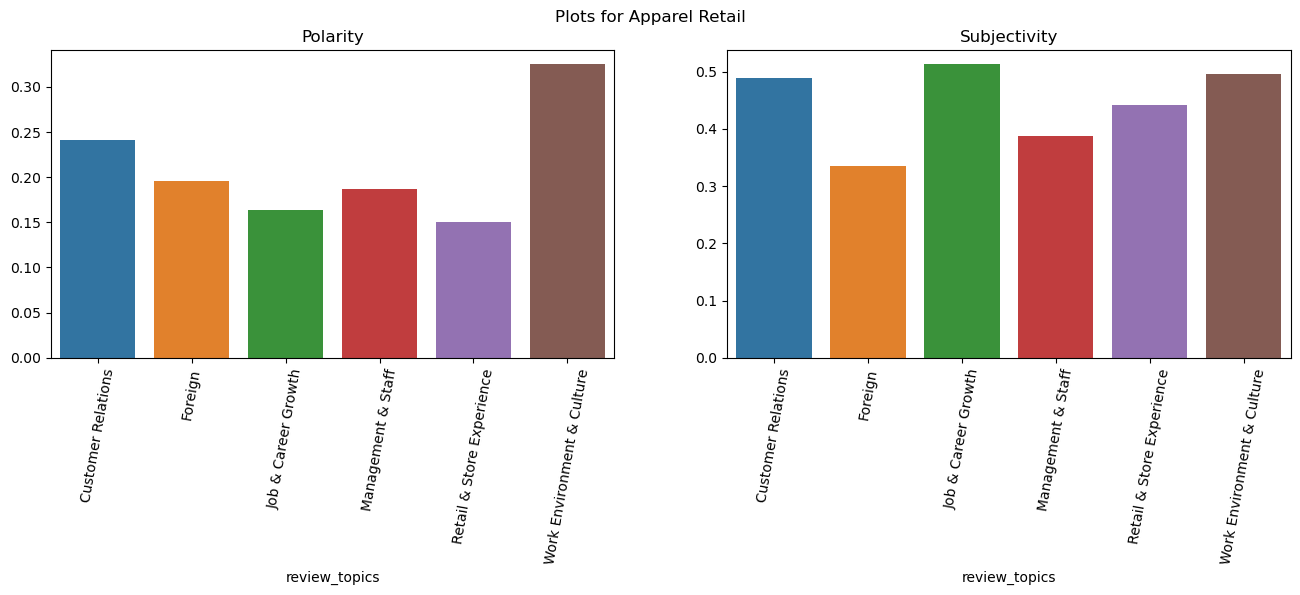

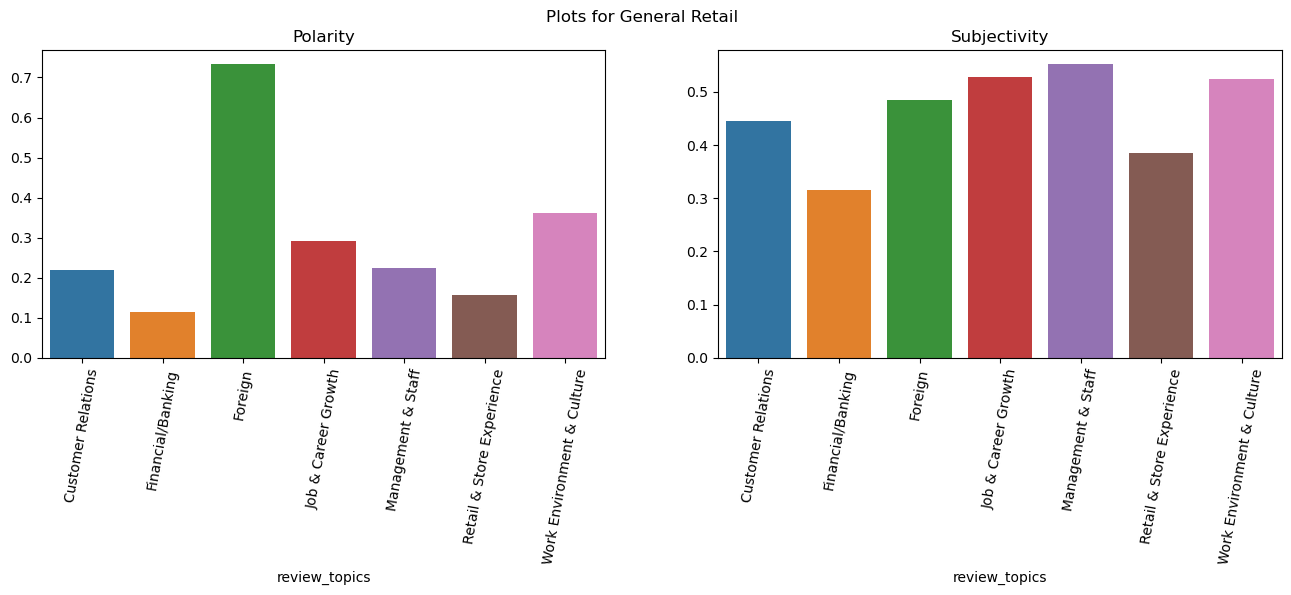

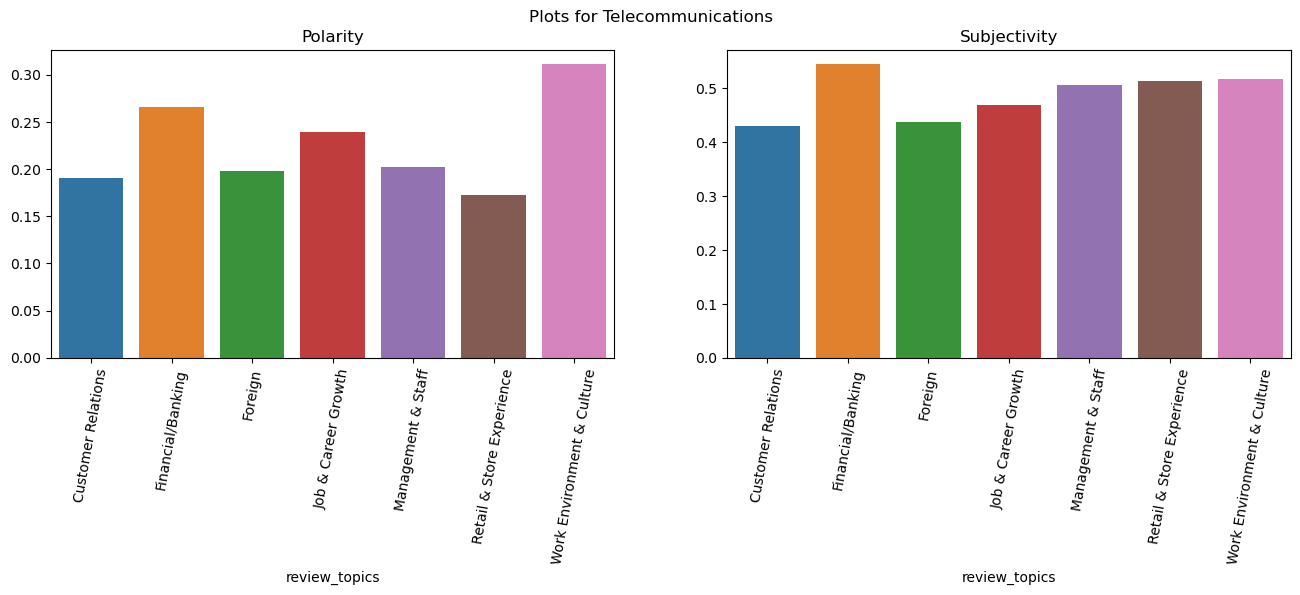

In [40]:
industries = review_data['Industry'].unique()


for industry in industries:
  condition = review_data['Industry'] == industry
  industry_polarity_group = review_data[condition].pivot_table(columns='review_topics' , values='review_polarity' , aggfunc='mean')
  industry_subjectivity_group = review_data[condition].pivot_table(columns='review_topics' , values='review_subjectivity' , aggfunc='mean')

  fig , axes = plt.subplots(1 , 2 , figsize=(16 , 4))

  plt.suptitle(f'Plots for {industry}')

  X = industry_polarity_group.columns
  y = industry_polarity_group.values.flatten()
  sns.barplot(x=X , y=y , ax=axes[0] , hue=X)
  axes[0].set_title('Polarity')
  axes[0].set_xticklabels(axes[0].get_xticklabels() , rotation=80)

  X = industry_subjectivity_group.columns
  y = industry_subjectivity_group.values.flatten()
  sns.barplot(x=X , y=y , ax=axes[1] , hue=X)
  axes[1].set_title('Subjectivity')
  axes[1].set_xticklabels(axes[1].get_xticklabels() , rotation=80)

  plt.show()



From all of the plots **Work Environment and Culture** Seems to be some of the more positive things written about

They all have a polarity roughly around 0.3 (which is around moderately positive)

<br>
Both the Telecommunications , Finance, General Retail Industry seems to have the highest **Job and Carerr Growth Opportunities** 

They have a polarity of roughly 0.2 - 0.23 (which is around slightly positive)

<br>
All of the plots have a moderate Subjectivity of around 0.3 to 0.5. This can suggest that they are speaking from experience (hence such a high subjectivity). This can mean give more support to their reviews being truthful and honest.

The High number of **Foreign Reviews** from General Retail Suggests that it may be saturated by foreigners

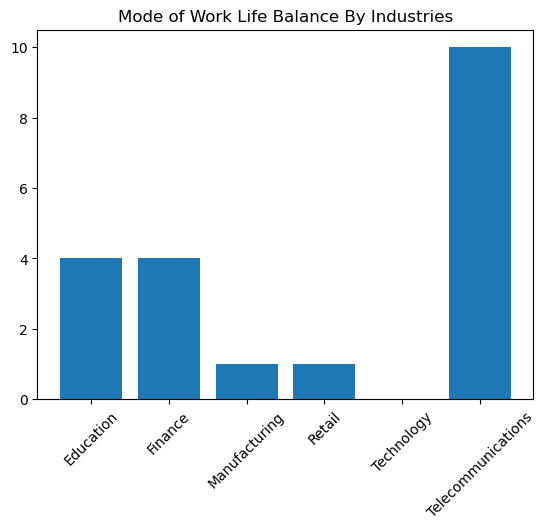

In [42]:
## Goal, group by work life balance, figure out how industries work life balances are affected

# Plotting the work life balance against industries
# work life balance is abbrev to wlb
# Why mode? since wlb is a rating, it can technically be a categorial data
# Where the rating is label encoded etc
# Mode will give a better metric of center
mode_wlb = dataset.groupby(by='Industry')['Work_Life_Balance'].apply(lambda x: x.mode())

X = list(map(lambda x : x[0] , mode_wlb.index))
y = mode_wlb.values

plt.bar(X , y)
plt.xticks(rotation=45)
plt.title('Mode of Work Life Balance Rating By Industries')
plt.show()

Overall we see that is is common for there to be poor work life balance in general for corporate

The only exception being the Telecommunications Industry with a mode of 10

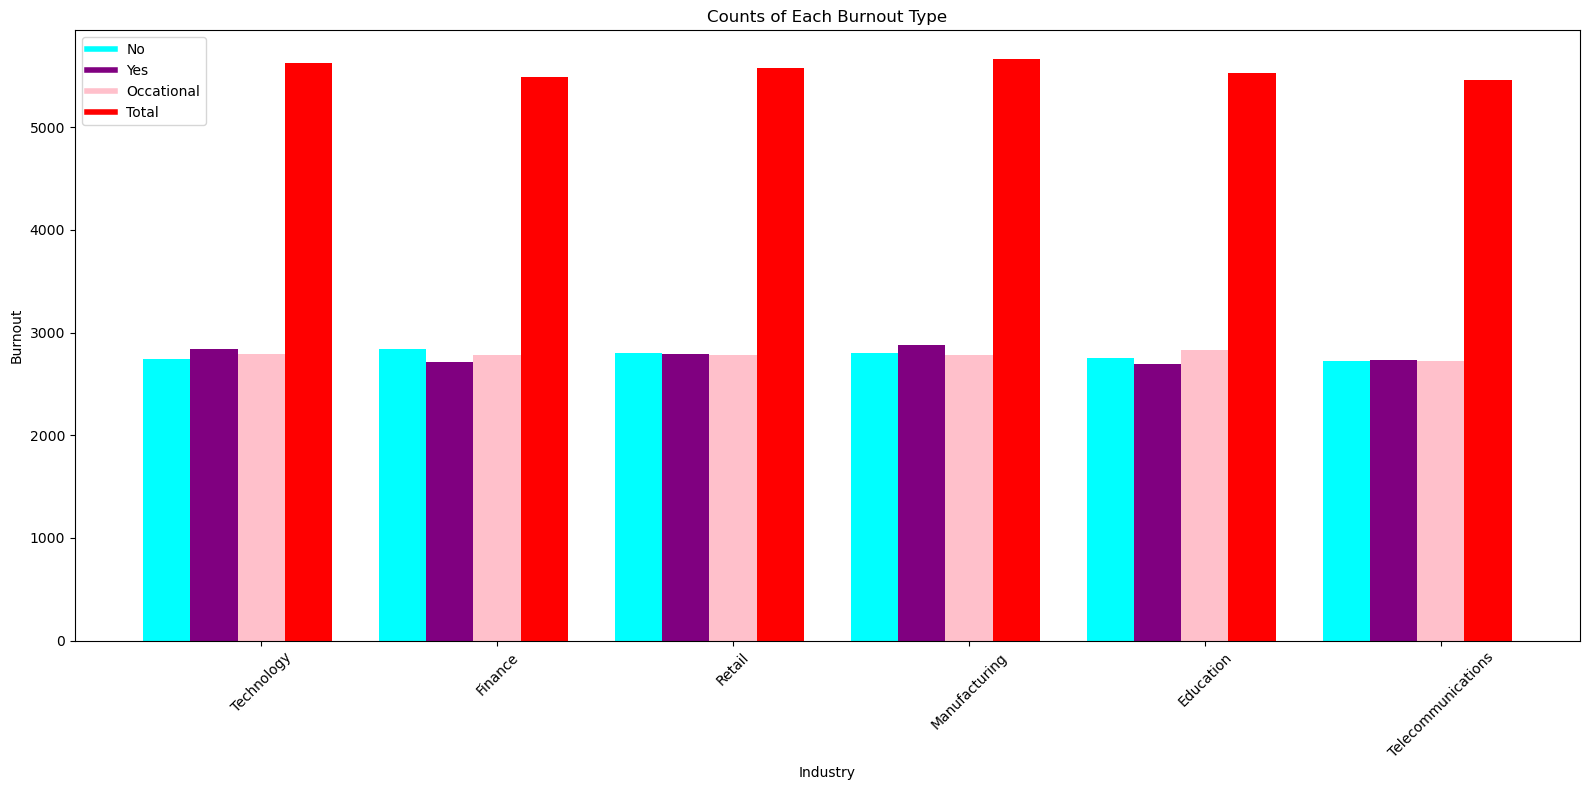

In [52]:
## Bar 
plt.figure(figsize=(16 , 8))
industries = dataset['Industry'].unique()

for i , industry in enumerate(industries):
  X = np.array([i])
  condition = dataset['Industry'] == industry
  data = dataset[condition][['Burnout_Symptoms']].value_counts()
  

  plt.bar(X - 0.2 , data.get(0 , 0) , width=0.2 , color='cyan')
  plt.bar(X , data.get(1 , 0) , width=0.2 ,  color='purple' )
  plt.bar(X + 0.2 , data.get(2 , 0) , width=0.2 , color='pink')
  plt.bar(X + 0.4 , data.get(2 , 0) + data.get(1 , 0) , width=0.2 , color='red')


handles = [
    plt.Line2D([0], [0], color='cyan', lw=4),  # for 'No'
    plt.Line2D([0], [0], color='purple', lw=4),  # for 'Yes'
    plt.Line2D([0], [0], color='pink', lw=4),  # for 'Occasional'
    plt.Line2D([0], [0], color='red', lw=4)  # for 'Total'
]
  
plt.xlabel('Industry')
plt.ylabel('Burnout')
plt.xticks([p + 0.2 for p in range(len(industries))] , industries , rotation=45)
plt.title('Counts of Each Burnout Type')
plt.legend(handles=handles , labels=['No' , 'Yes' , 'Occational' , 'Total'])
plt.tight_layout()
plt.show()


This shows that in every industry, about 66% of the employees have experienced burnout while working


This may suggest that corporate work environments may not have such a gentle work environment; regardless of industry

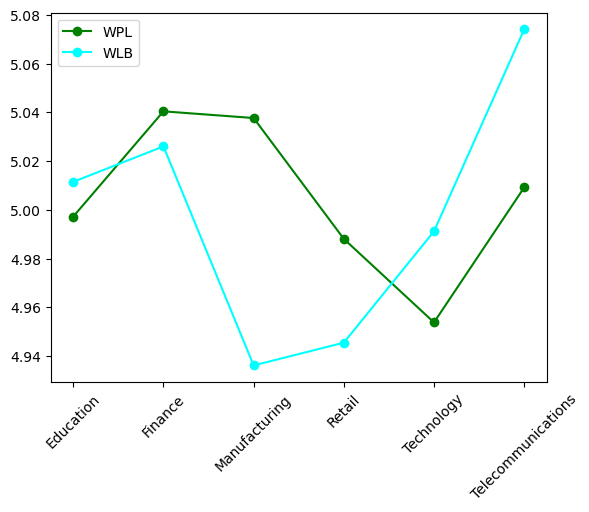

In [54]:
# Plotting the work pressure level
industries_work_pressure_group = dataset.pivot_table(columns='Industry' , values='Work_Pressure_Level' , aggfunc='mean')
labels = industries_work_pressure_group.columns
data = industries_work_pressure_group.values.flatten()

industries_wlb = dataset.pivot_table(columns='Industry' , values='Work_Life_Balance' , aggfunc='mean')
X = industries_wlb.columns
y = industries_wlb.values.flatten()

plt.plot(labels , data , marker='o' , color='green' , label='WPL')
plt.plot(X, y, marker='o' , color='cyan' , label='WLB')
plt.legend()
plt.xticks(rotation=45)
plt.show()


There isn't any real relationship between WLB and WPL in each industry

But both Finance and Manufacturing Generally have a higher WPL than the others

On the contrary, Technology and Telecommunications have a higher WLB compared to their WPL

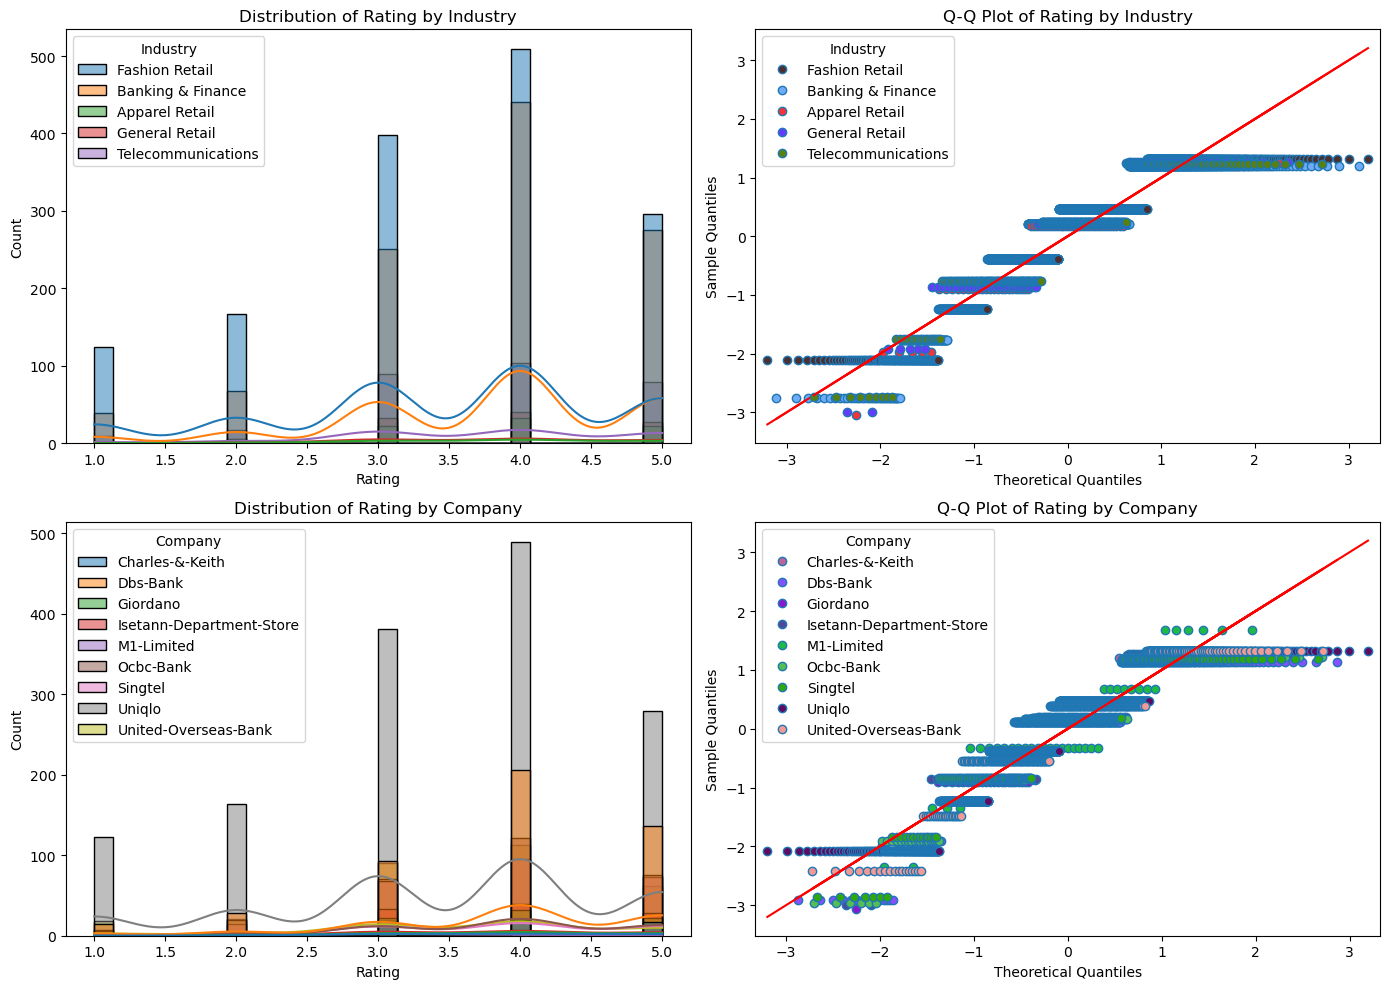

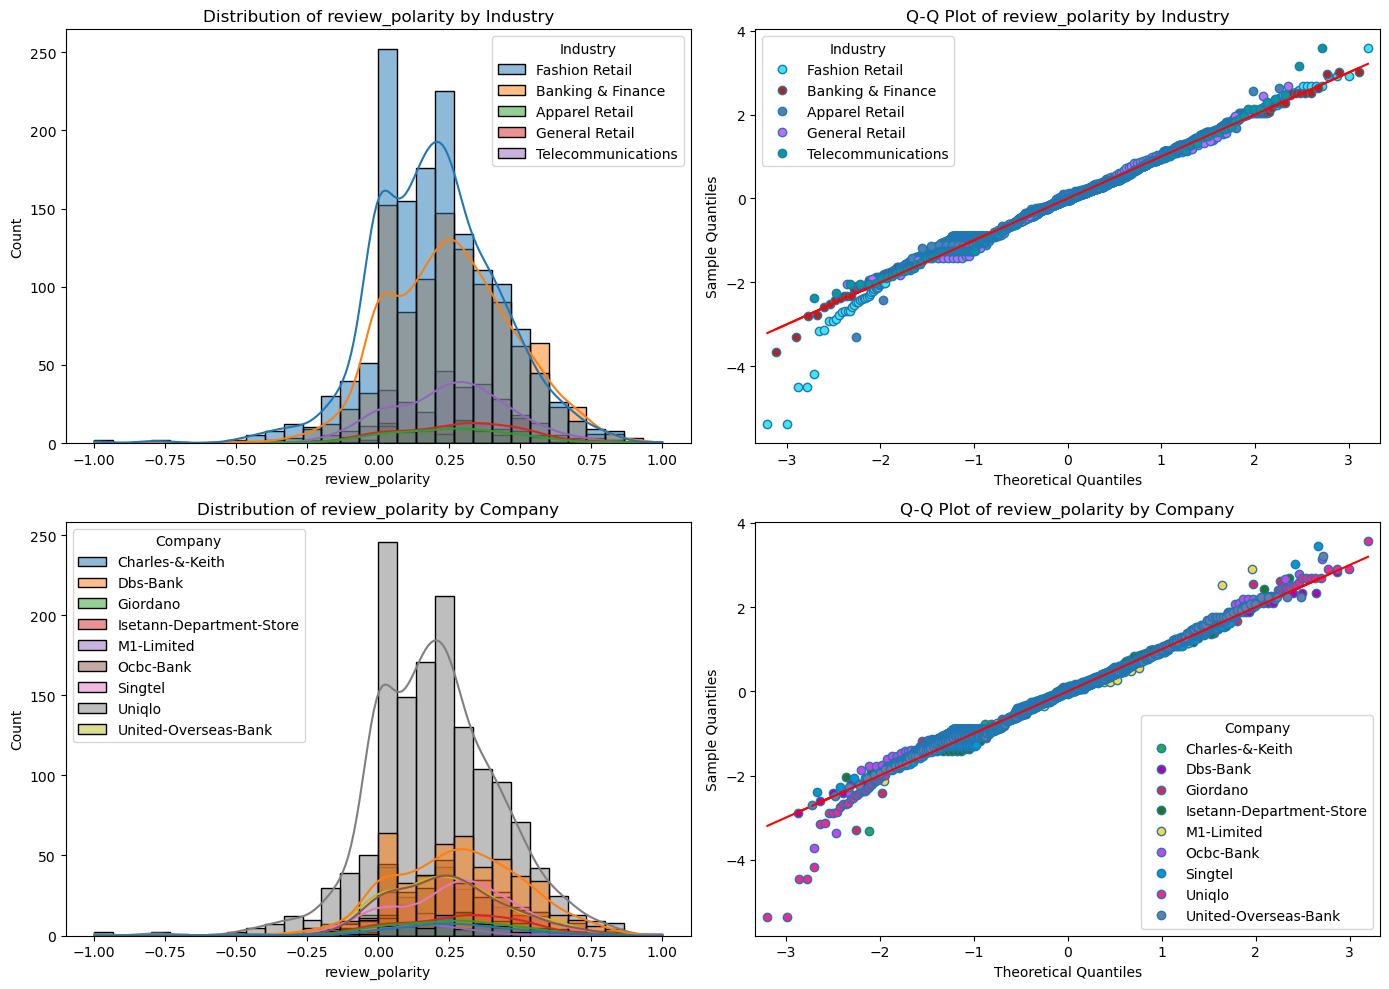

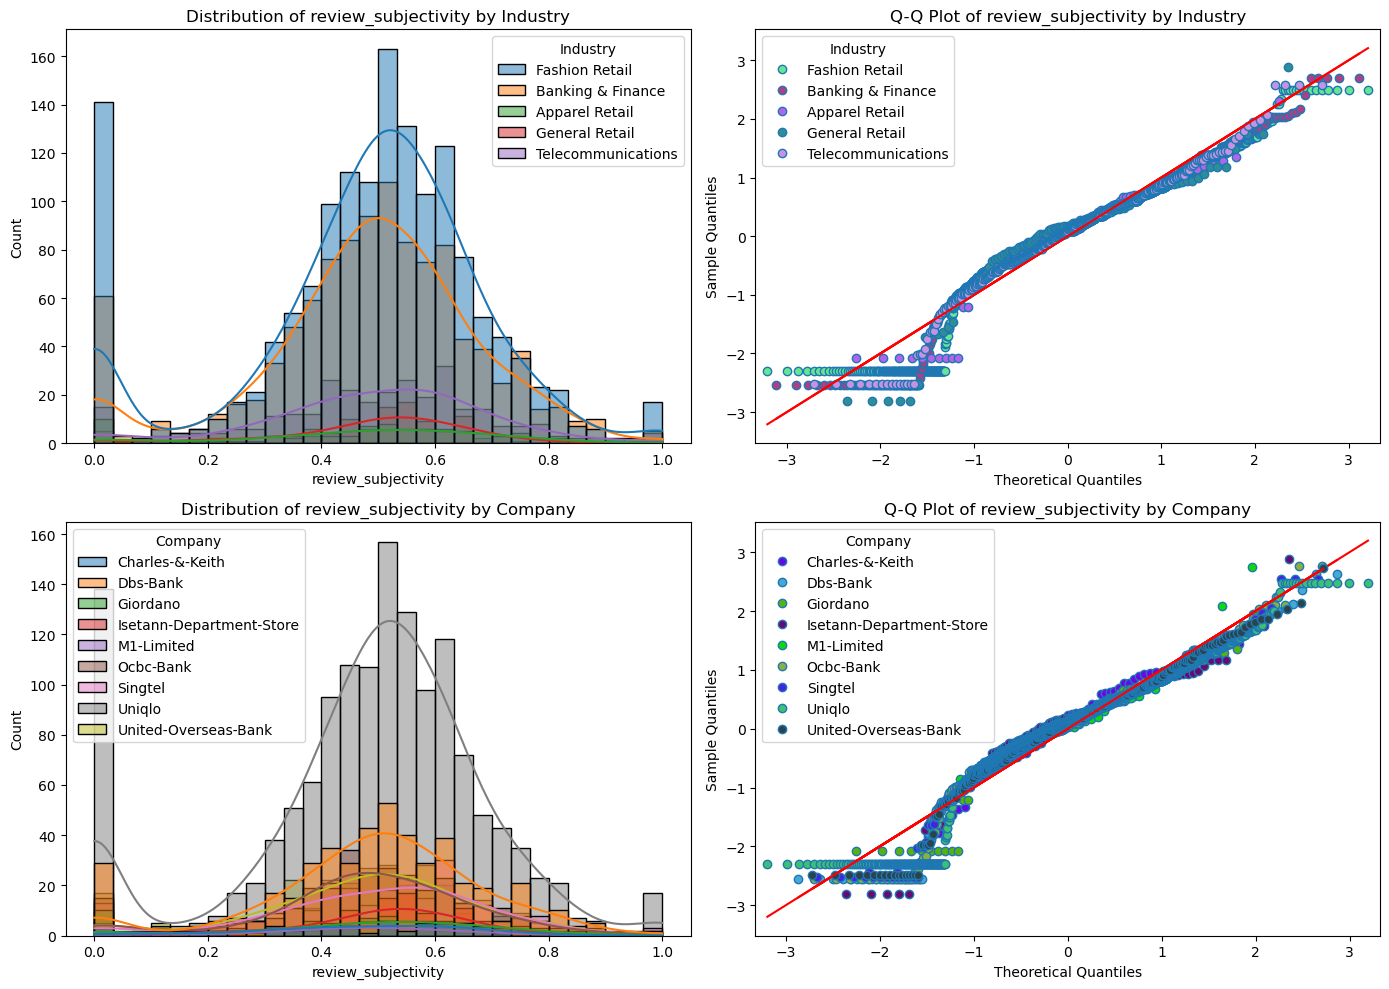

In [55]:
import random  # Import the random module



# Example: Assigning colors dynamically
# Assign a random color
# Generate a random color
def get_random_color():
    return (random.random(), random.random(), random.random())  # RGB tuple

# Loop through each numerical column
for col in numerical_columns:
    fig, axes = plt.subplots(2, 2, figsize=(14, 10))  # 2 rows, 2 columns layout
    
    ## PLOT FOR INDUSTRY ##
    # Histogram + KDE
    sns.histplot(data=review_data, x=col, hue="Industry", bins=30, kde=True, ax=axes[0, 0])
    axes[0, 0].set_title(f"Distribution of {col} by Industry")
    axes[0, 0].set_xlabel(col)
    axes[0, 0].set_ylabel("Count")

    # Q-Q Plot
    for industry in review_data["Industry"].unique():
        random_color = get_random_color()
        sm.qqplot(review_data[review_data["Industry"] == industry][col].dropna(), line="s", fit=True, ax=axes[0, 1], **{'markerfacecolor': random_color}, label=industry)
    axes[0, 1].set_title(f"Q-Q Plot of {col} by Industry")
    axes[0, 1].legend(title="Industry")

    ## PLOT FOR COMPANY ##
    # Histogram + KDE
    sns.histplot(data=review_data, x=col, hue="Company", bins=30, kde=True, ax=axes[1, 0])
    axes[1, 0].set_title(f"Distribution of {col} by Company")
    axes[1, 0].set_xlabel(col)
    axes[1, 0].set_ylabel("Count")

    # Q-Q Plot
    for company in review_data["Company"].unique():
        random_color = get_random_color()
        sm.qqplot(review_data[review_data["Company"] == company][col].dropna(), line="s", fit=True, ax=axes[1, 1], **{'markerfacecolor': random_color}, label=company)
    axes[1, 1].set_title(f"Q-Q Plot of {col} by Company")
    axes[1, 1].legend(title="Company")

    # Adjust layout for better visualization
    plt.tight_layout()
    plt.show()



##### Polarity

All of the plots are generally normally distributed

Though there is some negative skewed data, which are most likely outliers 

Looking closely at the plots the negative skewed data is from Fashion Retail

However overall, the data seems to be congregated between 0 to 0.25, suggesting that most reviews are mildly or completely neutral

##### Subjectivity

For all the plots, there seems to be a concentration around the 0.4-0.6 region, suggesting that most of the reviews are moderately subjective

This can mean that most of the reviews are opinions, less 'factually spoken'

### Rating

Overall it seems that most ratings lie around between 3-5 for all industries

## Conclusion

For competetive Salary: 
  - Graduates can look into Healthcare, Law, and Technology For the Highest Salaries
  - Other Competitive fields with potential growth in salary are Business, Security, Science, Engineering, Social.
  - Stay in your company for at least a few year, your salary will increase with time

  - What can this mean for employment?:
    - These industries are more likely to also have a higher employment rate
    - A higher employment rate can also lead to a better work-life-balance (due to company benefits etc)

For Job Stability and Employment: 
  - Focus on Manufacturing, Education, Admin, Retail Jobs
  - Avoid Finance and Professional Service Jobs as they have significantly lower employment
  - Industries such as Law and Healthcare are also good and unlikely to fall to external events (like pandemics)

 
For Career Growth:
  - Trying Finance, Retail and the Telecommunications Industry as they have good job stability and growth according to reviews


For Work Life Balance:
  - In general most jobs in Retail, Telecommunications and Finance Should have decent Work Environment and Culture

  - Try to avoid Jobs From any industry within corporate. They typically have higher discrimination and burnout

